In [6]:
import tensorflow as tf

hello = tf.constant('Hello,Tensorflow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello,Tensorflow!'


In [30]:
#keras分类实例
from keras.datasets import mnist

import numpy as np
np.random.seed(1337)
from keras.models import Sequential #按（层）顺序建立model
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.optimizers import RMSprop #优化器采用RMSprop，加速神经网络训练方法

(X_train, y_train), (X_test,y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0],-1)/255 #特征值标准化，每个值都是0~1内的数字
X_test = X_test.reshape(X_test.shape[0],-1)/255
y_train = np_utils.to_categorical(y_train, 10) #先将y转为字符型，分为10类，one-hot向量化编码
y_test = np_utils.to_categorical(y_test, 10) 

In [31]:
#建模
model = Sequential([ #注意与回归的区别
    Dense(32, input_dim=784), #784=28*28，即像素数（矩阵维度）,32是输出（output_dim）
    Activation('relu'),
    Dense(10),
    Activation('softmax')
])

rms = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(
    optimizer=rms,
    loss='categorical_crossentropy',#交叉熵损失，在多分类里也叫softmax
    metrics=['accuracy'] #貌似是添加返回的数值，可以上网查下.即需要监控的数据值
)

#train
print('\nNow training...')
model.fit(X_train, y_train, epochs=2, batch_size=32) #epochs为训练次数，batch_size为每次放进去多少个数据，参考之后的回归问题

#test
print('\nNow testing...')
loss, accuracy = model.evaluate(X_test, y_test) 

print('Now test loss:', loss)
print('Now test accuracy:',accuracy)


Now training...
Epoch 1/2
60000/60000 [==============================] - 2s 28us/step - loss: 0.3434 - acc: 0.9046
Epoch 2/2
60000/60000 [==============================] - 2s 27us/step - loss: 0.1949 - acc: 0.9438

Now testing...
10000/10000 [==============================] - 0s 18us/step
Now test loss: 0.1746918427079916
Now test accuracy: 0.9502


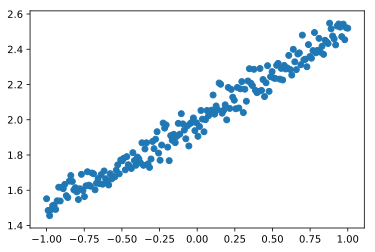

In [52]:
#keras回归实例
import keras #这一行可以单独运行下看看后台调用的库
import numpy as np
np.random.seed(1337)
from keras.models import Sequential #按（层）顺序建立model
from keras.layers import Dense #Dence为全连接层
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg' #画的图更清晰

#构建一个回归类型数据
X = np.linspace(-1,1,200)
np.random.shuffle(X) #令X随机取值
Y = 0.5*X + 2 - np.random.normal(0,0.05,(200,)) #要训练的W，b值分别是0.5和2，即y=0.5X+2
plt.scatter(X,Y)
plt.show()

In [53]:
X_train, Y_train = X[:160], Y[:160] #160个
X_test, Y_test = X[160:], Y[160:] #40个
print(X_train)
print(Y_train)

[-0.70854271  0.1758794  -0.30653266  0.74874372 -0.02512563  0.33668342
 -0.85929648  0.01507538 -0.13567839  0.72864322  0.24623116 -0.74874372
 -0.78894472  0.50753769  0.03517588  0.35678392 -0.55778894  0.2361809
 -0.25628141 -0.44723618  0.2160804  -0.43718593 -0.64824121  0.69849246
 -0.03517588 -0.45728643  0.86934673  0.73869347  0.53768844 -0.67839196
 -0.75879397  0.55778894  0.28643216 -0.05527638 -0.86934673  0.1959799
 -0.57788945 -0.9798995  -0.6080402  -0.63819095  0.84924623  0.41708543
  0.13567839  0.79899497 -0.47738693  0.46733668  0.59798995 -0.80904523
 -0.98994975 -0.36683417 -0.5678392  -0.00502513 -0.53768844 -0.37688442
 -0.65829146 -0.1959799   0.06532663  0.44723618 -0.01507538 -0.6281407
  0.02512563 -0.71859296 -0.14572864 -0.46733668  0.07537688  0.85929648
  0.76884422  0.40703518 -0.68844221  0.68844221 -0.29648241  0.66834171
 -0.95979899 -0.33668342  0.26633166 -0.82914573  1.         -0.5879397
 -0.69849246 -0.20603015  0.63819095 -0.88944724 -0.407

In [16]:
#回归建模

model = Sequential() #建立模型
model.add(Dense(output_dim=1, input_dim=1)) #添加全连接层，设置输入输出数量，因为是一次函数回归，只有一个x和y

#本次只需一层即可
#model.add(Dense(output_dim=1)) #第二层的时候，默认了上一层的输出即为这一层的输入，只需要设置输出就可以了

#搭建model
model.compile(loss='mse',optimizer='sgd') #分别是误差计算方式和优化器（乱序）

#train
for step in range(301):
    cost = model.train_on_batch(X_train, Y_train)
    if step % 100 == 0:
        print('Now train cost:', cost)

#test
print('\nNow testing...')
cost = model.evaluate(X_test, Y_test, batch_size=40) #batch_size根据测试集大小而定
print('Now test cost:', cost)
W,b = model.layers[0].get_weights() #在第一个Dense层里训练的结果
print('weight:',W,'b:',b)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=1)`
  


Now train cost: 4.14482
Now train cost: 0.1285275
Now train cost: 0.018342052
Now train cost: 0.0063315155

Now testing...
40/40 [==============================] - 0s 524us/step
Now test cost: 0.007565406151115894
weight: [[0.40550032]] b: [1.9892131]


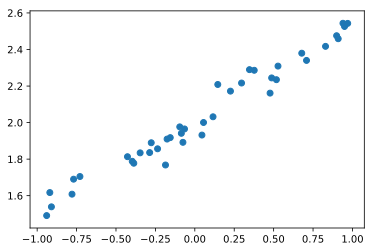

In [21]:
#输出结果对比
Y_pred = model.predict(X_test)
plt.scatter(X_test,Y_test)#点图，测试集的点
#plt.plot(X_test, Y_pred)#拟合的线图,预测的点组成的线,这行不注释就是画在一起
plt.show()

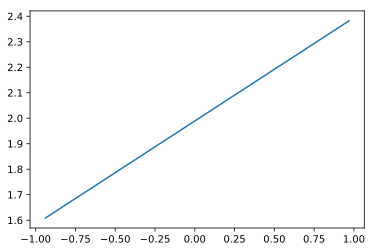

In [19]:
plt.plot(X_test, Y_pred)#线图,预测的点组成的线
plt.show()

In [51]:
#卷积神经网络CNN实践
from keras.datasets import mnist

import numpy as np
np.random.seed(1337)
from keras.models import Sequential #按（层）顺序建立model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import RMSprop #优化器采用RMSprop，加速神经网络训练方法

·

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

model = Sequential()

#卷积层Convolutional
model.add(Conv2D(
    filters=32, #从原来的的1张图生成32张图
    kernel_size=(5,5), #filter的宽和
    padding = 'same', #padding method
    input_shape=(28,28,1) #1是高度（黑白是1，彩色是3），后面是高和宽    
))
model.add(Activation('relu'))

#取样层pooling
model.add(MaxPooling2D(
    pool_size=(2,2),#
    strides=(2,2), #取样跳过的像素长度
    padding='same'
))

#第2个卷积层Convolutional
model.add(Conv2D(64,(5,5),padding='same'))
model.add(Activation('relu'))

#第2个取样层pooling
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.25)) #让一个神经元以某一固定的概率失活,防止过拟合

#全连接层
model.add(Flatten()) #将三维的层抹平成一维的层
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#第二个连接层
model.add(Dense(10))
model.add(Activation('softmax'))

#Compile model.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#train
print('\nNow training...')
model.fit(X_train, y_train, epochs=2, batch_size=32) #epochs为训练次数，batch_size为每次放进去多少个数据，参考之后的回归问题

#test
print('\nNow testing...')
loss, accuracy = model.evaluate(X_test, y_test) 

print('Now test loss:', loss)
print('Now test accuracy:',accuracy)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(kernel_size=(5, 5), padding="same", input_shape=(28, 28, 1..., filters=32)`



Now training...
Epoch 1/2
60000/60000 [==============================] - 85s 1ms/step - loss: 0.1531 - acc: 0.9514
Epoch 2/2
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0616 - acc: 0.9811

Now testing...
10000/10000 [==============================] - 4s 448us/step
Now test loss: 0.02496250123612699
Now test accuracy: 0.9919
